## ▣ 지역별 미세먼지 연도 변화량

### ○ 한글 패키지 & 마이너스 문제 해결

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,343 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120895 files and dire

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

### ○ 라이브러리 불러오기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### ○ CSV 파일 불러오기

In [4]:
from google.colab import files
uploaded = files.upload()

Saving fine_dust.csv to fine_dust.csv


### ○ CSV 파일 확인하기

In [5]:
file = open('fine_dust.csv')
data = pd.read_csv(file, index_col='area')
data

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
area,,,,,,,,,,,,,,,,,,,
Seoul,71,76,69,61,58,60,61,55,54,49,47,41,45,46,45,48,44,40,42
Gyeonggi,71,74,68,67,65,68,66,60,60,58,56,49,54,54,53,53,51,44,46
Incheon,52,57,61,62,61,68,64,57,60,55,55,47,49,49,53,49,46,40,43
Busan,60,69,55,60,58,59,57,51,49,49,47,43,49,48,46,44,44,41,36
Daegu,67,71,59,0,55,54,53,57,48,51,47,42,45,45,46,43,42,39,39
Gwangju,57,52,36,46,49,55,52,50,46,45,43,38,42,41,43,40,40,41,42
Daejeon,48,53,43,49,48,49,49,45,43,44,44,39,42,41,46,44,45,44,42
Ulsan,0,54,40,50,50,52,53,54,49,48,49,46,47,46,46,43,43,40,37
Sejong,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,47,40,44


### ○ 경기-대구, 2016년~2019년 그룹 막대 그래프

In [6]:
#해당 데이터 추출
data_group = data.loc['Gyeonggi':'Daegu', '2016':'2019']
data_group

,2016,2017,2018,2019
area,,,,
Gyeonggi,53,51,44,46
Incheon,49,46,40,43
Busan,44,44,41,36
Daegu,43,42,39,39


In [7]:
data_sample = [[53, 51, 44, 46],
            [49, 46, 40, 43],
            [44, 44, 41, 36],
            [43, 42,39, 39]]
DF_sample = pd.DataFrame(data_sample, index=['Gyeonggi', 'Incheon', 'Busan', 'Daegu'], columns=['2016', '2017', '2018', '2019'])
DF_sample

,2016,2017,2018,2019
Gyeonggi,53,51,44,46
Incheon,49,46,40,43
Busan,44,44,41,36
Daegu,43,42,39,39


In [8]:
DF_sample.loc['Busan'] # Series

2016    44
2017    44
2018    41
2019    36
Name: Busan, dtype: int64

In [9]:
DF_sample.loc[['Busan']] # DataFrame

,2016,2017,2018,2019
Busan,44,44,41,36


In [10]:
DF_sample.loc[DF_sample.index != 'Busan']

,2016,2017,2018,2019
Gyeonggi,53,51,44,46
Incheon,49,46,40,43
Daegu,43,42,39,39


In [12]:
DF_sample.loc['Gyeonggi':'Busan']

,2016,2017,2018,2019
Gyeonggi,53,51,44,46
Incheon,49,46,40,43
Busan,44,44,41,36


In [13]:
DF_sample.loc['2016']

KeyError: ignored

In [15]:
DF_sample.loc[:, "2016"] # Series

Gyeonggi    53
Incheon     49
Busan       44
Daegu       43
Name: 2016, dtype: int64

In [16]:
DF_sample.loc[:, ['2016']] # DataFrame

,2016
Gyeonggi,53
Incheon,49
Busan,44
Daegu,43


In [17]:
DF_sample.loc[:, DF_sample.columns != '2018']

,2016,2017,2019
Gyeonggi,53,51,46
Incheon,49,46,43
Busan,44,44,36
Daegu,43,42,39


In [18]:
DF_sample.loc[:, '2016':'2018']

,2016,2017,2018
Gyeonggi,53,51,44
Incheon,49,46,40
Busan,44,44,41
Daegu,43,42,39


In [19]:
DF_sample.loc[:, ['2016':'2018']]

SyntaxError: ignored

In [20]:
DF_sample.loc[:, ['2016','2018']]

,2016,2018
Gyeonggi,53,44
Incheon,49,40
Busan,44,41
Daegu,43,39


In [21]:
DF_sample.loc[:, '2016', '2018']

IndexingError: ignored

In [22]:
DF_sample.loc['Busan', '2018'] # Series

41

In [24]:
DF_sample.loc[["Busan"], ['2018']] # DataFrame

,2018
Busan,41


In [26]:
DF_sample.loc[['Gyeonggi', 'Busan'], '2018'] # Series

Gyeonggi    44
Busan       41
Name: 2018, dtype: int64

In [27]:
DF_sample.loc[['Gyeonggi', 'Busan'], ['2018']] # DataFrame

,2018
Gyeonggi,44
Busan,41


In [28]:
DF_sample.loc[['Gyeonggi' : 'Busan'], ['2016', '2018']]

SyntaxError: ignored

In [29]:
DF_sample.loc['Gyeonggi' : 'Busan', '2016' : '2018']

,2016,2017,2018
Gyeonggi,53,51,44
Incheon,49,46,40
Busan,44,44,41


In [30]:
DF_sample.loc['Gyeonggi' : 'Busan', '2018' : '2016']

""
Gyeonggi
Incheon
Busan


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

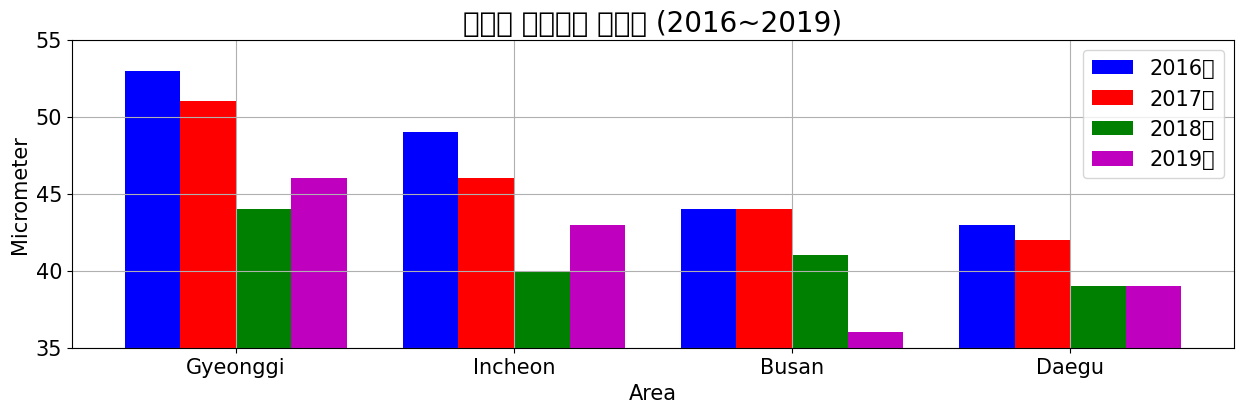

In [31]:
index = np.arange(4)
bar_width = 0.2  # 각 연도별 바의 너비

plt.figure(figsize=(15, 4))
plt.bar(index - bar_width * 1.5 + 0.3, data_group['2016'], width=0.2, label='2016년', color='b')
plt.bar(index - bar_width * 0.5 + 0.3, data_group['2017'], width=0.2, label='2017년', color='r')
plt.bar(index + bar_width * 0.5 + 0.3, data_group['2018'], width=0.2, label='2018년', color='g')
plt.bar(index + bar_width * 1.5 + 0.3, data_group['2019'], width=0.2, label='2019년', color='m')

plt.ylim(35, 55)
plt.xlabel('Area', fontsize=15)
plt.ylabel('Micrometer', fontsize=15)
plt.xticks(index+0.3, ['Gyeonggi', 'Incheon', 'Busan', 'Daegu'])
plt.title('지역별 미세먼지 변화량 (2016~2019)', fontsize=20)
plt.legend()
plt.grid()
plt.show()

In [32]:
index

array([0, 1, 2, 3])

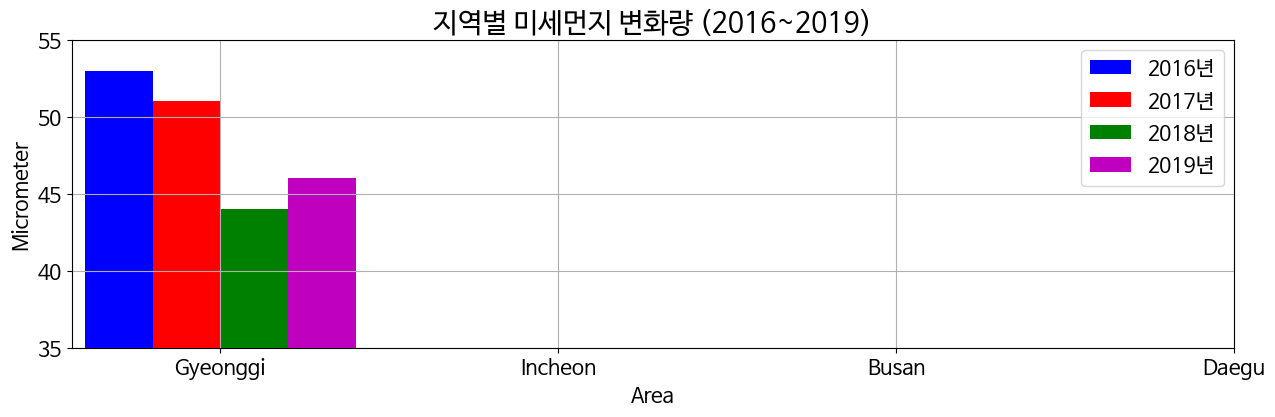

In [ ]:
bar_width = 0.2  # 각 연도별 바의 너비
plt.figure(figsize=(15, 4))
plt.bar(0 - bar_width * 1.5 + 0.3, data_group['2016'], width=0.2, label='2016년', color='b')
plt.bar(0 - bar_width * 0.5 + 0.3, data_group['2017'], width=0.2, label='2017년', color='r')
plt.bar(0 + bar_width * 0.5 + 0.3, data_group['2018'], width=0.2, label='2018년', color='g')
plt.bar(0 + bar_width * 1.5 + 0.3, data_group['2019'], width=0.2, label='2019년', color='m')

plt.ylim(35, 55)
plt.xlabel('Area', fontsize=15)
plt.ylabel('Micrometer', fontsize=15)
plt.xticks(index+0.3, ['Gyeonggi', 'Incheon', 'Busan', 'Daegu'])
plt.title('지역별 미세먼지 변화량 (2016~2019)', fontsize=20)
plt.legend()
plt.grid()
plt.show()

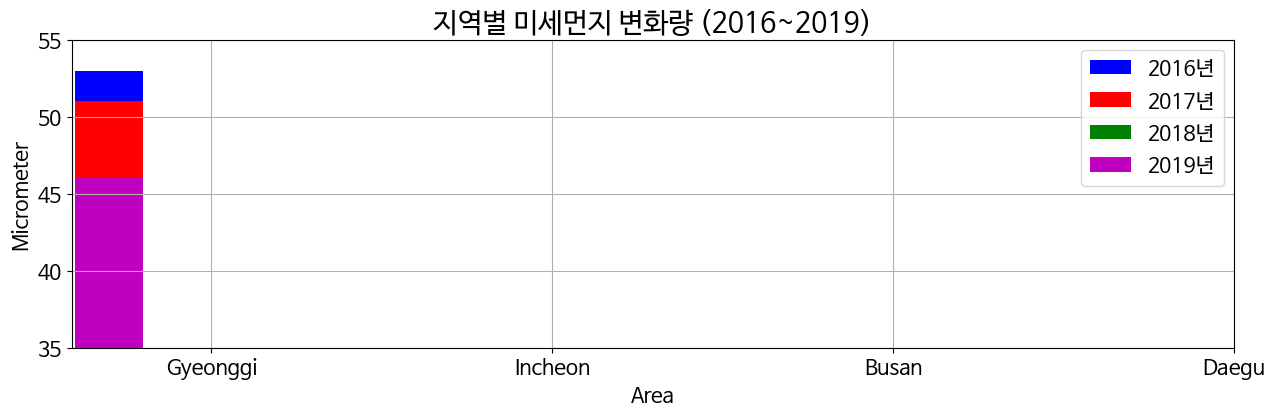

In [ ]:
plt.figure(figsize=(15, 4))
plt.bar(0, data_group['2016'], width=0.2, label='2016년', color='b')
plt.bar(0, data_group['2017'], width=0.2, label='2017년', color='r')
plt.bar(0, data_group['2018'], width=0.2, label='2018년', color='g')
plt.bar(0, data_group['2019'], width=0.2, label='2019년', color='m')

plt.ylim(35, 55)
plt.xlabel('Area', fontsize=15)
plt.ylabel('Micrometer', fontsize=15)
plt.xticks(index+0.3, ['Gyeonggi', 'Incheon', 'Busan', 'Daegu'])
plt.title('지역별 미세먼지 변화량 (2016~2019)', fontsize=20)
plt.legend()
plt.grid()
plt.show()

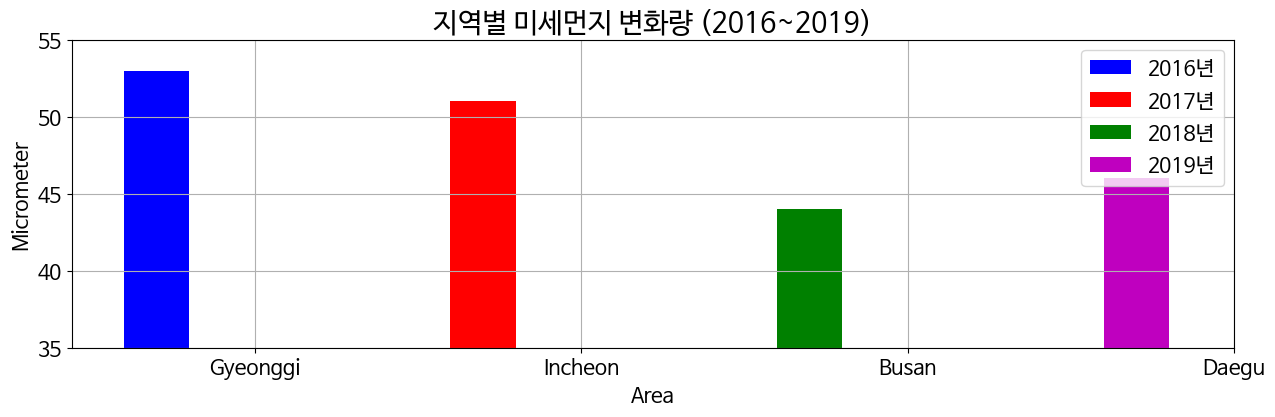

In [ ]:
plt.figure(figsize=(15,4))
plt.bar(0, data_group['2016'], width=0.2, label='2016년', color='b')
plt.bar(1, data_group['2017'], width=0.2, label='2017년', color='r')
plt.bar(2, data_group['2018'], width=0.2, label='2018년', color='g')
plt.bar(3, data_group['2019'], width=0.2, label='2019년', color='m')

plt.ylim(35,55)
plt.xlabel('Area', fontsize=15)
plt.ylabel('Micrometer', fontsize=15)
plt.xticks(index+0.3, ['Gyeonggi', 'Incheon', 'Busan', 'Daegu'])
plt.title('지역별 미세먼지 변화량 (2016~2019)', fontsize=20)
plt.legend(loc=1)
plt.grid()
plt.show()

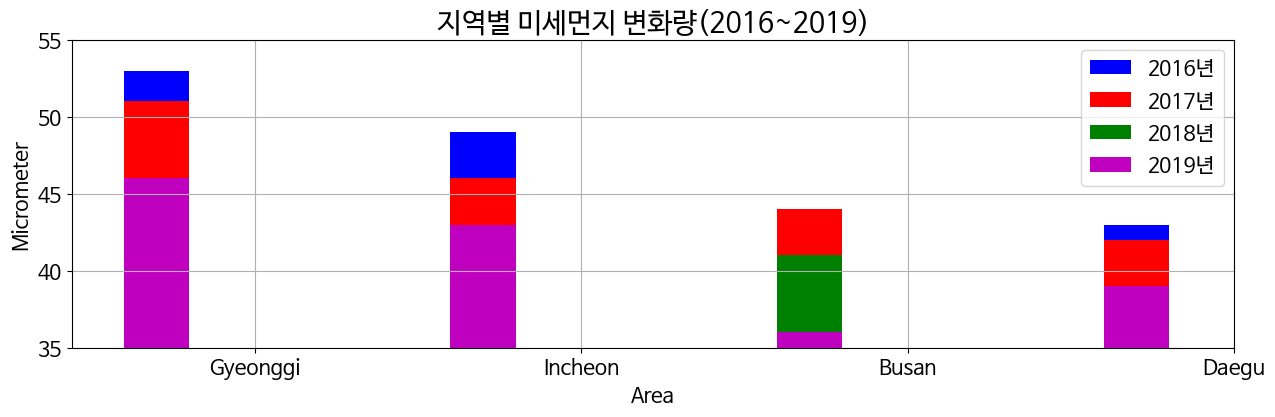

In [ ]:
plt.figure(figsize=(15,4))
plt.bar([0,1,2,3], data_group['2016'], width=0.2, label='2016년', color='b')
plt.bar([0,1,2,3], data_group['2017'], width=0.2, label='2017년', color='r')
plt.bar([0,1,2,3], data_group['2018'], width=0.2, label='2018년', color='g')
plt.bar([0,1,2,3], data_group['2019'], width=0.2, label='2019년', color='m')
plt.ylim(35,55)
plt.xlabel('Area', fontsize=15)
plt.ylabel('Micrometer', fontsize=15)
plt.xticks(index+0.3, ['Gyeonggi', 'Incheon', 'Busan', 'Daegu'])
plt.title('지역별 미세먼지 변화량(2016~2019)', fontsize=20)
plt.legend()
plt.grid()
plt.show()

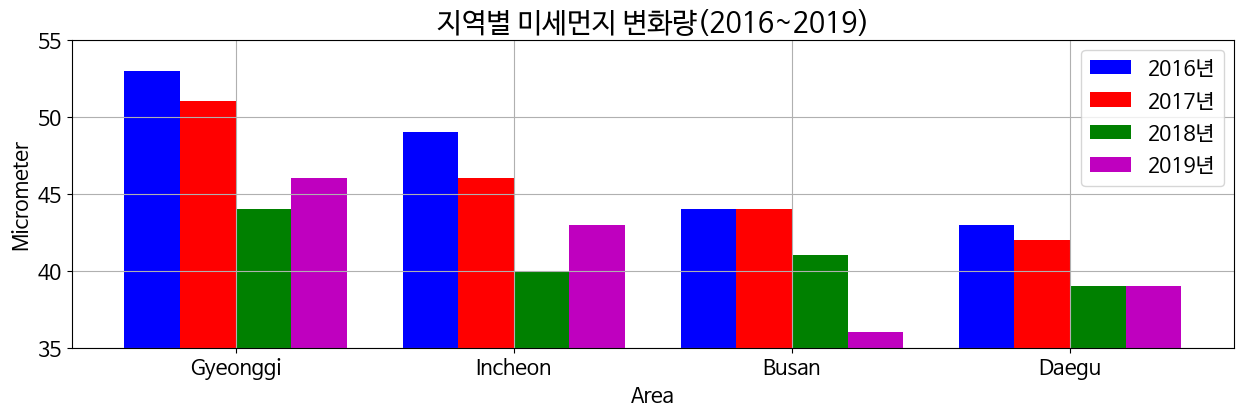

In [ ]:
plt.figure(figsize=(15,4))
plt.bar([0,1,2,3], data_group['2016'], width=0.2, label='2016년', color='b')
plt.bar([0.2,1.2,2.2,3.2], data_group['2017'], width=0.2, label='2017년', color='r')
plt.bar([0.4,1.4,2.4,3.4], data_group['2018'], width=0.2, label='2018년', color='g')
plt.bar([0.6,1.6,2.6,3.6], data_group['2019'], width=0.2, label='2019년', color='m')
plt.ylim(35,55)
plt.xlabel('Area', fontsize=15)
plt.ylabel('Micrometer', fontsize=15)
plt.xticks(index+0.3, ['Gyeonggi', 'Incheon', 'Busan', 'Daegu'])
plt.title('지역별 미세먼지 변화량(2016~2019)', fontsize=20)
plt.legend()
plt.grid()
plt.show()